# Lift gradient of a finite wing

Let us consider this wing:

In [13]:
%matplotlib inline
%run ./resources/init.py

In [14]:
c_r = 5.20; c_t=2.34; taper_ratio = c_r/c_t ;
b= 26.80 ; S = 101.04 ; AR=b*b/S;
cl_alpha_root=6.15; cl_alpha_tip=6.05

In [15]:
Latex(
  r'\begin{array}{ll}'
    +  r'\text{Wing Span,}\, \text{b}: & ' + r'{0:.4}'.format(b) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{Reference Surface,}\, S: & ' + r'{0:.5}'.format(S) + r'\,\text{m}^2'
    +  r'\\'
    +  r'\text{Tip Chord,}\, c_\mathrm{t}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{Root Chord,}\, c_\mathrm{r}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{Aspect Ratio,}\, AR: & ' + r'{0:.4}'.format(AR) 
    +  r'\\'
    +  r'\text{Root profile lift gradient,}\, C_{\ell\alpha,\text{r}}: & ' + r'{0}'.format(cl_alpha_root) + r'\,\text{rad}^{-1}'
    +  r'\\'
    +  r'\text{Tip profile lift Gradient,}\, bar{C}_{\ell\alpha,\text{t}}: & ' + r'{0}'.format(cl_alpha_tip) + r'\,\text{rad}^{-1}'
    +  r'\\'
  +r'\end{array}'
    )

<IPython.core.display.Latex object>

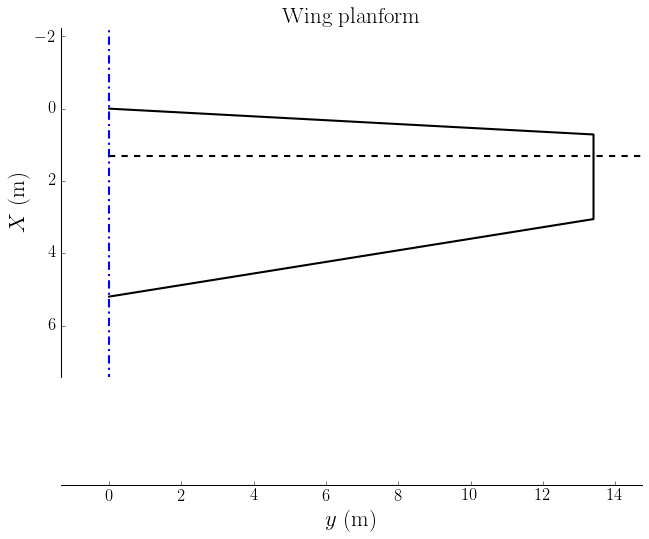

In [16]:
plot_planform(c_r,c_t,b)

The law of the chord is:
\begin{equation}
c(Y)=A_cY+B_c
\end{equation}

The law of $C_{\ell\alpha}$ is:
\begin{equation}
C_{\ell,\alpha}=A_{C_{\ell\alpha}}Y+B_{C_{\ell\alpha}}
\end{equation}

Let's calculate the coefficient:

In [17]:
A_c=2*(c_t-c_r)/b
B_c=c_r

In [18]:
Latex(r'\begin{array}{ll}'
        +r'\\'
        + r'A_c=\dfrac{c_t-c_r}{b/2}=' 
        + r'{0:.3}' .format(A_c)
        + r'\\'     
        + r'B_c=c_r='
        + r'{0:.3}'.format(B_c)
        + r'\, \text{m}'
       + r'\end{array}'
        )

<IPython.core.display.Latex object>

So we have:

In [19]:
display(Math(r'c(y) =\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

In [20]:
A_clalpha=2*(cl_alpha_tip-cl_alpha_root)/b
B_clalpha=cl_alpha_root

In [21]:
Latex(r'\begin{array}{ll}'
        +r'\\'
        + r'A_{C_{\ell\alpha}}=\dfrac{C_{\ell\alpha,t}-C_{\ell\alpha,r}}{b/2}=' 
        + r'{0:.3}' .format(A_clalpha)
        + r'\, (\text{rad m})^{-1}'
        + r'\\'     
        + r'B_{C_{\ell\alpha}}=C_{\ell\alpha,r}='
        + r'{0:.3}'.format(B_clalpha)
        + r'\, \text{rad}^{-1}'
       + r'\end{array}'
        )

<IPython.core.display.Latex object>

So we have:

In [22]:
display(Math(r'C_{\ell\alpha}(Y) =\,' + '{0:.3}'.format(A_clalpha) + r'( \text{rad m})^{-1}\,y + ' + '{0:.3}'.format(B_clalpha) + r'\,\text{rad}^{-1}'))

<IPython.core.display.Math object>

We can now calculate an average gradient:

In [23]:
c_lalphabar=integrate_clalpha_mean(A_c,B_c,A_clalpha,B_clalpha,b,S)[0]
display(Math(r'\bar{C_{\ell\alpha}} = '+ '{0:.4}'.format(c_lalphabar) +'\,\mathrm{rad}^{-1}'))

<IPython.core.display.Math object>

Here is the complete workflow

In [24]:
c_lalphabar_law_integral_indefinite=integrate_clalpha_mean(A_c,B_c,A_clalpha,B_clalpha,b,S)[1]
display_workflow_c_lalphabar(S,b,A_clalpha,B_clalpha,A_c,B_c,c_lalphabar_law_integral_indefinite,c_lalphabar)

<IPython.core.display.Latex object>

Finally we can calculate the Lift gradient of the finite wing:

In [25]:
eW=0.9
CLalpha=c_lalphabar/(1+c_lalphabar/(3.14*AR*eW))
Latex( 
  r'\begin{equation}'
    + r'C_{L\alpha}=\dfrac{\bar{C}_{\ell\alpha}}{1+\dfrac{\bar{C}_{\ell\alpha}}{\pi AR e_W}}='
    + r'\dfrac{'
    + r'{0:.4}' .format(c_lalphabar)
    + r'\, \text{rad}^{-1}}{1+\dfrac{'
    + r'{0:.4}' .format(c_lalphabar)
    + r'\, \text{rad}^{-1}}{3.14\cdot'
    + r'{0:.3}' .format(AR)
    + r'\cdot'
    + r'{0:.3}'.format(eW)
    + r'}}=' 
    + r'{0:.4}' .format(CLalpha)
    + r'\,\text{rad}^{-1}'
  + r'\end{equation}'
)

<IPython.core.display.Latex object>